In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

1. Attempt to compare different clustering algorithms based on how they cluster, as well as time.

- K-means
- Spectral clustering
- Mini-Batch K-means
- Gaussian mixture
- DBSCAN - although I did not teach you, it is simply a density-based that treats nearby instance as neighbors. It has two parameters (eps, min-points) that define the distance to considered as neighbors.

Attempt to play around with different parameters of each model. Last but probably the most important, interpret the result (why this algorithm works well or otherwise).  Use the dataset below.

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


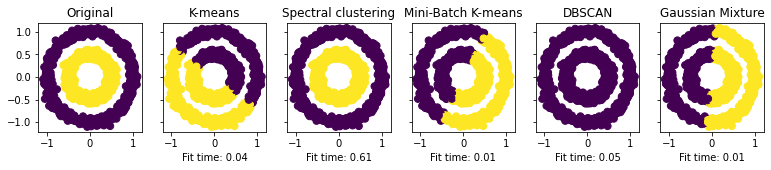

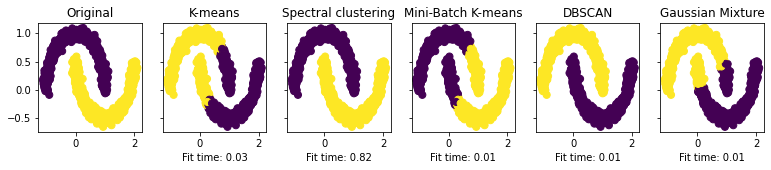

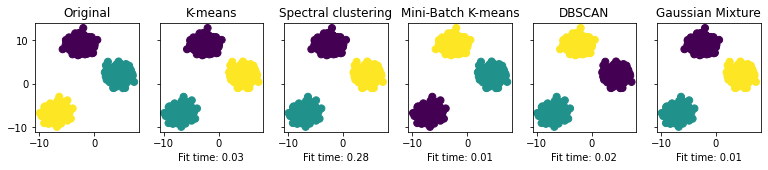

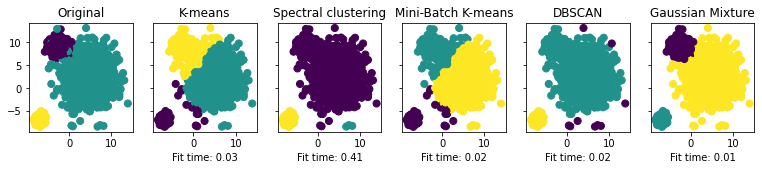

In [2]:
from time import time

#Attempt to compare different clustering algorithms 
#Based on how they cluster, as well as time
#-K-means
#-Spectral clustering
#-Mini-Batch K-means
#-Gaussian mixture
#-DBSCAN - although I did not teach you, it is simply a density-based
#that treats nearby instance as neighbors.  Definitely it has
#two parameters that define "what" proximity is considered neighbors
#here is the data

def plot_clusters(X, y, preds, models, fit_times, title):
    fig, ax = plt.subplots(1, 6, figsize=(13, 2), sharey=True)
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax[0].set_title("Original")
    for i, axi in enumerate(ax.flat[1:]):
        axi.scatter(X[:, 0], X[:, 1], c=preds[i], s=50, cmap='viridis')
        axi.set_xlabel(f"Fit time: {fit_times[i]:.2f}")
        axi.set_title(list(models.keys())[i])

n_samples = 1500

#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#normal blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

#std varied blobs
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)

datasets = [noisy_circles, noisy_moons, blobs, varied]
title = ['noisy circles', 'noisy moons', 
         'blobs', 'std varied blobs']

#defining the models for noisy circle and noisy moon
kmeans = cluster.KMeans(n_clusters=2)
#by default, it uses rbf, but nearest neighbors work well if things are geometrically clustered
spectral = cluster.SpectralClustering(n_clusters = 2, affinity="nearest_neighbors")
mini_batch_kmeans = cluster.MiniBatchKMeans(n_clusters=2)
#eps define the distance considered as neighbors.  
#thus higher the values, the farther samples are considered as same clusters
#I found that if I put value more than .2, it will consider
#the inner and outer circle as same cluster
dbscan = cluster.DBSCAN(eps = .2)
gmm = mixture.GaussianMixture(n_components = 2)

models = {
    "K-means": kmeans,
    "Spectral clustering": spectral,
    "Mini-Batch K-means": mini_batch_kmeans,
    "DBSCAN": dbscan,
    "Gaussian Mixture": gmm
}

for ix, dataset in enumerate(datasets[:2]):
    X, y = dataset
    dataset_name = title[ix]
    preds = []
    fit_times = []
    for ix, (name, model) in enumerate(models.items()):
        start = time()
        model.fit(X)
        fit_times.append(time() - start)
        #for spectral clustering which has no "predict" func
        if hasattr(model, 'labels_'):
            preds.append(model.labels_)
        else:
            preds.append(model.predict(X))
    plot_clusters(X, y, preds, models, fit_times, dataset_name)
    

#defining the models for blobs
kmeans = cluster.KMeans(n_clusters=3)
spectral = cluster.SpectralClustering(n_clusters = 3)
mini_batch_kmeans = cluster.MiniBatchKMeans(n_clusters=3)

#set eps to be very high, so it can consume the whole cluster
#probably one of the biggest critic of DBSCAN is to
#choose the right eps....especially when you cannot visualize!
#perhaps using the same elbow method may work
dbscan = cluster.DBSCAN(eps = 2)
gmm = mixture.GaussianMixture(n_components = 3)

models = {
    "K-means": kmeans,
    "Spectral clustering": spectral,
    "Mini-Batch K-means": mini_batch_kmeans,
    "DBSCAN": dbscan,
    "Gaussian Mixture": gmm
}

for ix, dataset in enumerate(datasets[2:]):
    X, y = dataset
    dataset_name = title[ix]
    preds = []
    fit_times = []
    for ix, (name, model) in enumerate(models.items()):
        start = time()
        model.fit(X)
        fit_times.append(time() - start)
        #for spectral clustering which has no "predict" func
        if hasattr(model, 'labels_'):
            preds.append(model.labels_)
        else:
            preds.append(model.predict(X))
    plot_clusters(X, y, preds, models, fit_times, dataset_name)

I think the first lesson learned is that there are really no one best algorithms.  Each has its own place.  Some comments:

- **K-means** perform only well in equal-sized blobs.  It is also important to note that most data in real-world is rarely a equal-sized blobs, thus k-means can be at most a good baseline algorithms for clustering
- **Mini-Batch K-means** is simply a much faster variant of K-means, thus there is NO reason at all to use K-means
- Note that **Spectral clustering** support many kernels. By default it uses rbf.  For moons and circles, it makes more sense to use nearest neighbors as geodesic distance will work much better than euclidean distances.   One big big drawback of spectral clustering is its fit time!  It's almost 50 times slower than other algorithms!
- **DBSCA**N shines when cluster are continous, such as the moon or the two circles.  On the other hand, it fails terribly on last case, since it consider any nearby neighbors within eps distance to be the same cluster.  Perhaps adjusting eps would give better result - but that's another drawback!  Deciding the right eps is not easy given there is really no one metric to decide the goodness-of-fit for clustering
- **Gaussian mixture** is a gaussian-based distribution algorithm and surprisinly is the only one algorithm able to beat the last dataset.  But of course, since it's gaussian, it remains a spherical/eclipse shape and when we give only 2 components, it is like overlaying two eclipse and thus fail terribly on the first two datasets.

2. Implement spectral clustering with nearest neighbors kernel
Source: https://arxiv.org/pdf/0711.0189.pdf

Spectral clustering is a linear-algebra way of framing the clustering problems.  By making it a graph problem, we can define the best partition between subset of graphs based on minimizing graph cut.  Again, for those who would like to understand spectral embedding, recommend to read this paper: https://arxiv.org/pdf/0711.0189.pdf

The steps are simple (after all difficult derivation):

1. Create a **adjacency matrix (A)** graph.  You can use sklearn.neighbors.kneighbors_graph to create an adjacency matrix

For those who are unfamiliar with adjacency matrix, consider this matrix.  In reality, A, B, C, D do not exist, I just wrote for explaination purpose.

<code>  
     A B C D
A  [[0 1 1 0
B    1 0 1 0
C    1 1 0 0
D    0 0 0 0]]
</code>

Adjacency matrix is basically telling who are connected to who.  Here A is connected to B and C.  Since this is an undirected graph, thus B and C are also connected to A as depicted in their intersections.
    
2. Compute the **degree matrix(D)**

Degree matrix is simply the sum of all rows.  With the above example, it will be [2, 2, 2, 0]. Given it's a matrix, we will be putting these values in a diagonals like this:

<code>
[[2 0 0 0
  0 2 0 0
  0 0 2 0
  0 0 0 0]]
</code>
  
3. Compute the **Laplacian graph**

Laplacian is simply D - A which becomes

<code>
[[2 -1 -1 0
  -1 2 -1 0
  -1 -1 2 0
   0 0  0 0]]
</code>

4. This Laplacian graph has a nice (powerful) property, that is, its eigenvalues actually inform us the connection between nodes.  Bigger eigenvalues represent bigger connections.  Specifically, the first eigenvalues of L will be merely the connection of the whole graph which will always be 0 (because it's one connected component thus there are no connection), but then the second smallest eigenvalues (also known as Fielder value) will give you the optimal partition between two graphs.  It approximates the minimium graph cut needed to separate into two connected components.  It works because remember that eigenvalues = connectivity.  Thus the second smallest eigenvalue will tell us the minimum separation of two components, which is the best point to cut between two clusters!

5.  Last, we simply use the sign of the eigenvector to partition into either clusters.


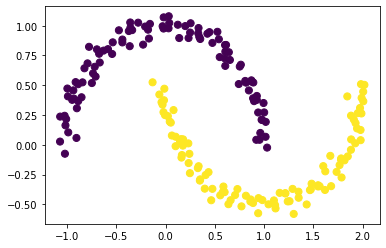

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='viridis');

First eigenvalues should be 0 accordingspectral clustering proof:  (-6.895525817007808e-17+0j)
First eigenvectors should be c across all row accordingspectral clustering proof:  [-0.07071068 -0.07071068 -0.07071068 -0.07071068 -0.07071068]


"\nYou may wonder how about situations with more than 2 clusters.  Since\neigenvectors contain information about the connection, we can simply\ninput the eigenvectors (let's say we want 4 clusters), thus we\ncan simply write:\n\nkmeans = KMeans(n_clusters = 4)\nkmeans.fit(eigenvectors[:, 1:4])\npreds = kmeans.labels_\n\nThat's it!\n"

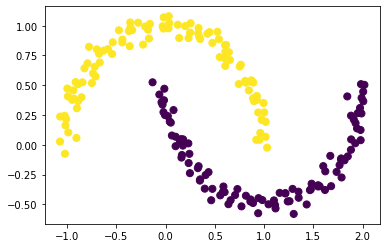

In [6]:
# Your code here

from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

X, y = make_moons(200, noise=.05, random_state=0)

#create an adjacency matrix
#this kneighbors_graph treats evvery data point as node
#and edge is drown to another node only if they are
#within the nth nearest neighbors (here I use 10)
A = kneighbors_graph(X, n_neighbors=10).toarray()

#create the degree matrix
#which is basically the sum of each row of A, and put it in the diagonal axis
D = np.diag(A.sum(axis=1))

#Laplacian graph is basically D - A
L = D - A

#find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

#sort eigenvectors based on eigenvalues sort
#THIS IS DIFFERENT FROM PCA BECAUSE WE ARE SORTING SMALLEST TO BIGGEST
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]

#use eigenvector with second SMALLEST eigenvalues (also known as
#Fiedler value) to find best cut to separate data
#then use the sign of eigenvectors to determine the labels
#second smallest eigenvalues will tell us the minimum connection
#between two big component
preds = eigenvectors[:, 1] > 0

#Just for your information
print("First eigenvalues should be 0 according" + 
      "spectral clustering proof: ", eigenvalues[0])

#.real convert complex numbers to float
# c is any constant.  
# take first five for shortening the presentation
print("First eigenvectors should be c across all row according" + 
      "spectral clustering proof: ", eigenvectors[:, 0][:5].real)

plt.scatter(X[:, 0], X[:, 1], c=preds,
            s=50, cmap='viridis')

"""
You may wonder how about situations with more than 2 clusters.  Since
eigenvectors contain information about the connection, we can simply
input the eigenvectors (let's say we want 4 clusters), thus we
can simply write:

kmeans = KMeans(n_clusters = 4)
kmeans.fit(eigenvectors[:, 1:4])
preds = kmeans.labels_

That's it!
"""